In [1]:
import pandas as pd 
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [3]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [6]:
df.Age = df.Age.fillna(df.Age.mean())

In [7]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.000000,7.2500
1,1,1,female,38.000000,71.2833
2,1,3,female,26.000000,7.9250
3,1,1,female,35.000000,53.1000
4,0,3,male,35.000000,8.0500
...,...,...,...,...,...
886,0,2,male,27.000000,13.0000
887,1,1,female,19.000000,30.0000
888,0,3,female,29.699118,23.4500
889,1,1,male,26.000000,30.0000


In [8]:
df.Sex = df.Sex.replace({'male':1,'female':0})

In [9]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.000000,7.2500
1,1,1,0,38.000000,71.2833
2,1,3,0,26.000000,7.9250
3,1,1,0,35.000000,53.1000
4,0,3,1,35.000000,8.0500
...,...,...,...,...,...
886,0,2,1,27.000000,13.0000
887,1,1,0,19.000000,30.0000
888,0,3,0,29.699118,23.4500
889,1,1,1,26.000000,30.0000


In [10]:
X = df.drop(['Survived'], axis= 'columns')

In [11]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,0,38.000000,71.2833
2,3,0,26.000000,7.9250
3,1,0,35.000000,53.1000
4,3,1,35.000000,8.0500
...,...,...,...,...
886,2,1,27.000000,13.0000
887,1,0,19.000000,30.0000
888,3,0,29.699118,23.4500
889,1,1,26.000000,30.0000


In [12]:
y = df.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=7)

In [44]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [45]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
model.score(X_test,y_test)

0.8156424581005587

 167.60999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(139.38983218163872, 167.60999999999999, 'X[3] <= 98.752\ngini = 0.403\nsamples = 93\nvalue = [67, 26]'),
 Text(136.74580454096744, 158.55, 'X[3] <= 26.144\ngini = 0.436\nsamples = 81\nvalue = [55, 26]'),
 Text(134.10177690029616, 149.49, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(139.38983218163872, 149.49, 'X[3] <= 26.469\ngini = 0.461\nsamples = 72\nvalue = [46, 26]'),
 Text(136.74580454096744, 140.43, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(142.03385982230998, 140.43, 'X[2] <= 60.5\ngini = 0.444\nsamples = 69\nvalue = [46, 23]'),
 Text(139.38983218163872, 131.37, 'X[3] <= 27.135\ngini = 0.467\nsamples = 62\nvalue = [39, 23]'),
 Text(130.21836130306022, 122.30999999999999, 'X[2] <= 55.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(127.57433366238895, 113.24999999999999, 'X[2] <= 46.5\ngini = 0.375\nsamples = 8\nvalue = [2, 6]'),
 Text(124.93030602171768, 104.19, 'X[2] <= 28.85\ngini = 0.444

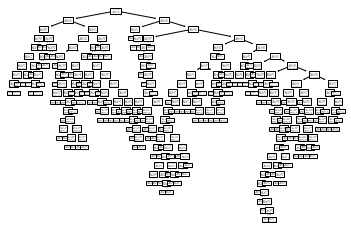

In [56]:
tree.plot_tree(model)